简单的神经网络 初始化

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array(
    [[0.1, 1.1, 0.5], [1.1, 0.1, 1.5], [0.3, 1.4, 0.7], [1.4, 0.1, 1.1], [0.5, 1.8, 0.9], [1.0, 0.6, 1.8],
     [0.7, 1.9, 0.1], [1.1, 0.2, 1.3], [0.9, 2.1, 0.8], [1.5, 0.1, 1.8], [0.1, 1.8, 0.6], [1.5, 0.3, 1.9],
     [0.3, 1.7, 0.2], [1.7, 0.4, 1.5], [0.5, 1.1, 0.3], [1.6, 0.6, 1.8], [0.7, 1.5, 0.2], [1.5, 0.8, 1.2],
     [0.9, 1.9, 0.5], [1.9, 1, 2.6]])
X = X.T  # 转置X

y = np.array(
    [[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]])

m = X.shape[1]
X = (X - np.mean(X)) / np.linalg.norm(X, ord=2, axis=1, keepdims=True)  # 归一化输入

w1 = np.random.randn(3, 4) * np.sqrt(1 / 3)  # 权重初始化
b1 = np.random.randn(4, 1)
w2 = np.random.randn(4, 1) * np.sqrt(1 / 4)
b2 = np.random.randn(1, 1)
alpha = 1  # 学习效率
lambd = 0.03  # 正则化参数
cost = np.zeros(500)  # 初始化记录代价的列表

定义激活函数

In [2]:
def sigmoid(z):  # 激活函数
    a = 1 / (1 + np.exp(-z))
    return a

定义激活函数的导数

In [3]:
def d_sigmoid(a):  # 激活函数的导数
    return a * (1 - a)

定义预测函数

In [4]:
def predict(x):  # 预测函数
    x = np.array([x])
    x = (x.T - np.mean(x)) / np.linalg.norm(x, ord=2, axis=1, keepdims=True)
    z1_test = np.dot(w1.T, x) + b1
    a1_test = sigmoid(z1_test)
    z2_test = np.dot(w2.T, a1_test) + b2
    a2_test = sigmoid(z2_test)
    return a2_test

迭代运算

In [5]:
for i in range(0, 500):  # 迭代500次
    # 向前传播
    Z1 = np.dot(w1.T, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(w2.T, A1) + b2
    A2 = sigmoid(Z2)
    # 反向传播
    dz2 = (A2 - y)
    dw2 = np.dot(A1, dz2.T) / m + lambd * w2 / m
    db2 = np.sum(dz2, axis=1, keepdims=True) / m
    dz1 = np.dot(w2, dz2) * d_sigmoid(A1)
    dw1 = np.dot(X, dz1.T) / m + lambd * w1 / m
    db1 = np.sum(dz1, axis=1, keepdims=True) / m
    # 更新权重
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    # 记录代价（损失、误差）
    cost[i] = -1 / m * np.sum(y * np.log(A2) + (1 - y) * np.log(1 - A2))

图像显示

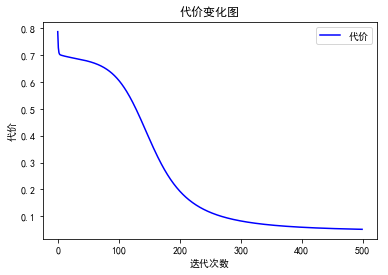

In [6]:
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置正常显示中文
plt.plot(cost, "b", label='代价')             # 设置曲线数值
plt.xlabel("迭代次数")                        # 设置X轴的名字
plt.ylabel("代价")                            # 设置Y轴的名字
plt.title("代价变化图")                       # 设置标题
plt.legend()                                  # 设置图例
plt.show()                                    # 显示图表

显示计算结果

In [7]:
print("w1:" + str(w1) + "\nw2:" + str(w1))   # 显示权重
print("b1:" + str(b1) + "\nb2:" + str(b2))

w1:[[ 3.53485299  2.41501319 -1.69594659 -0.46506595]
 [-3.95670511 -2.90826621  2.73447831  1.24344382]
 [ 3.1645732   2.29206756 -2.2545134  -0.80372522]]
w2:[[ 3.53485299  2.41501319 -1.69594659 -0.46506595]
 [-3.95670511 -2.90826621  2.73447831  1.24344382]
 [ 3.1645732   2.29206756 -2.2545134  -0.80372522]]
b1:[[ 0.01965446]
 [-0.02949129]
 [ 0.05821271]
 [-1.00424847]]
b2:[[-2.5647781]]


验证计算结果

In [8]:
print("predict 0 rate:%f%%" % ((1 - predict([0.1, 0.7, 0.5])) * 100))
print("predict 0 rate:%f%%" % ((1 - predict([0.9, 1.8, 0.5])) * 100))
print("predict 1 rate:%f%%" % (predict([1.2, 1.0, 1.5]) * 100))
print("predict 1 rate:%f%%" % (predict([1.8, 0.1, 1.9]) * 100))

predict 0 rate:99.518280%
predict 0 rate:99.713837%
predict 1 rate:92.412660%
predict 1 rate:99.882484%
